# Masking With Canny Edge Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def mask_cat(image_path):
    
    cat_img = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(cat_img, cv2.COLOR_BGR2GRAY)
    
    _, binary_img = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)
    
    contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask filled with zeros
    mask = np.zeros_like(gray_img)
    
    # Draw contours on the mask filled with white color
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    # Apply the binary mask to the original image to get the cat's shape
    masked_cat = cv2.bitwise_and(cat_img, cat_img, mask=mask)
    
    return masked_cat, mask

In [3]:
import os
from PIL import Image

output_folder = 'poisson-masksEdge'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

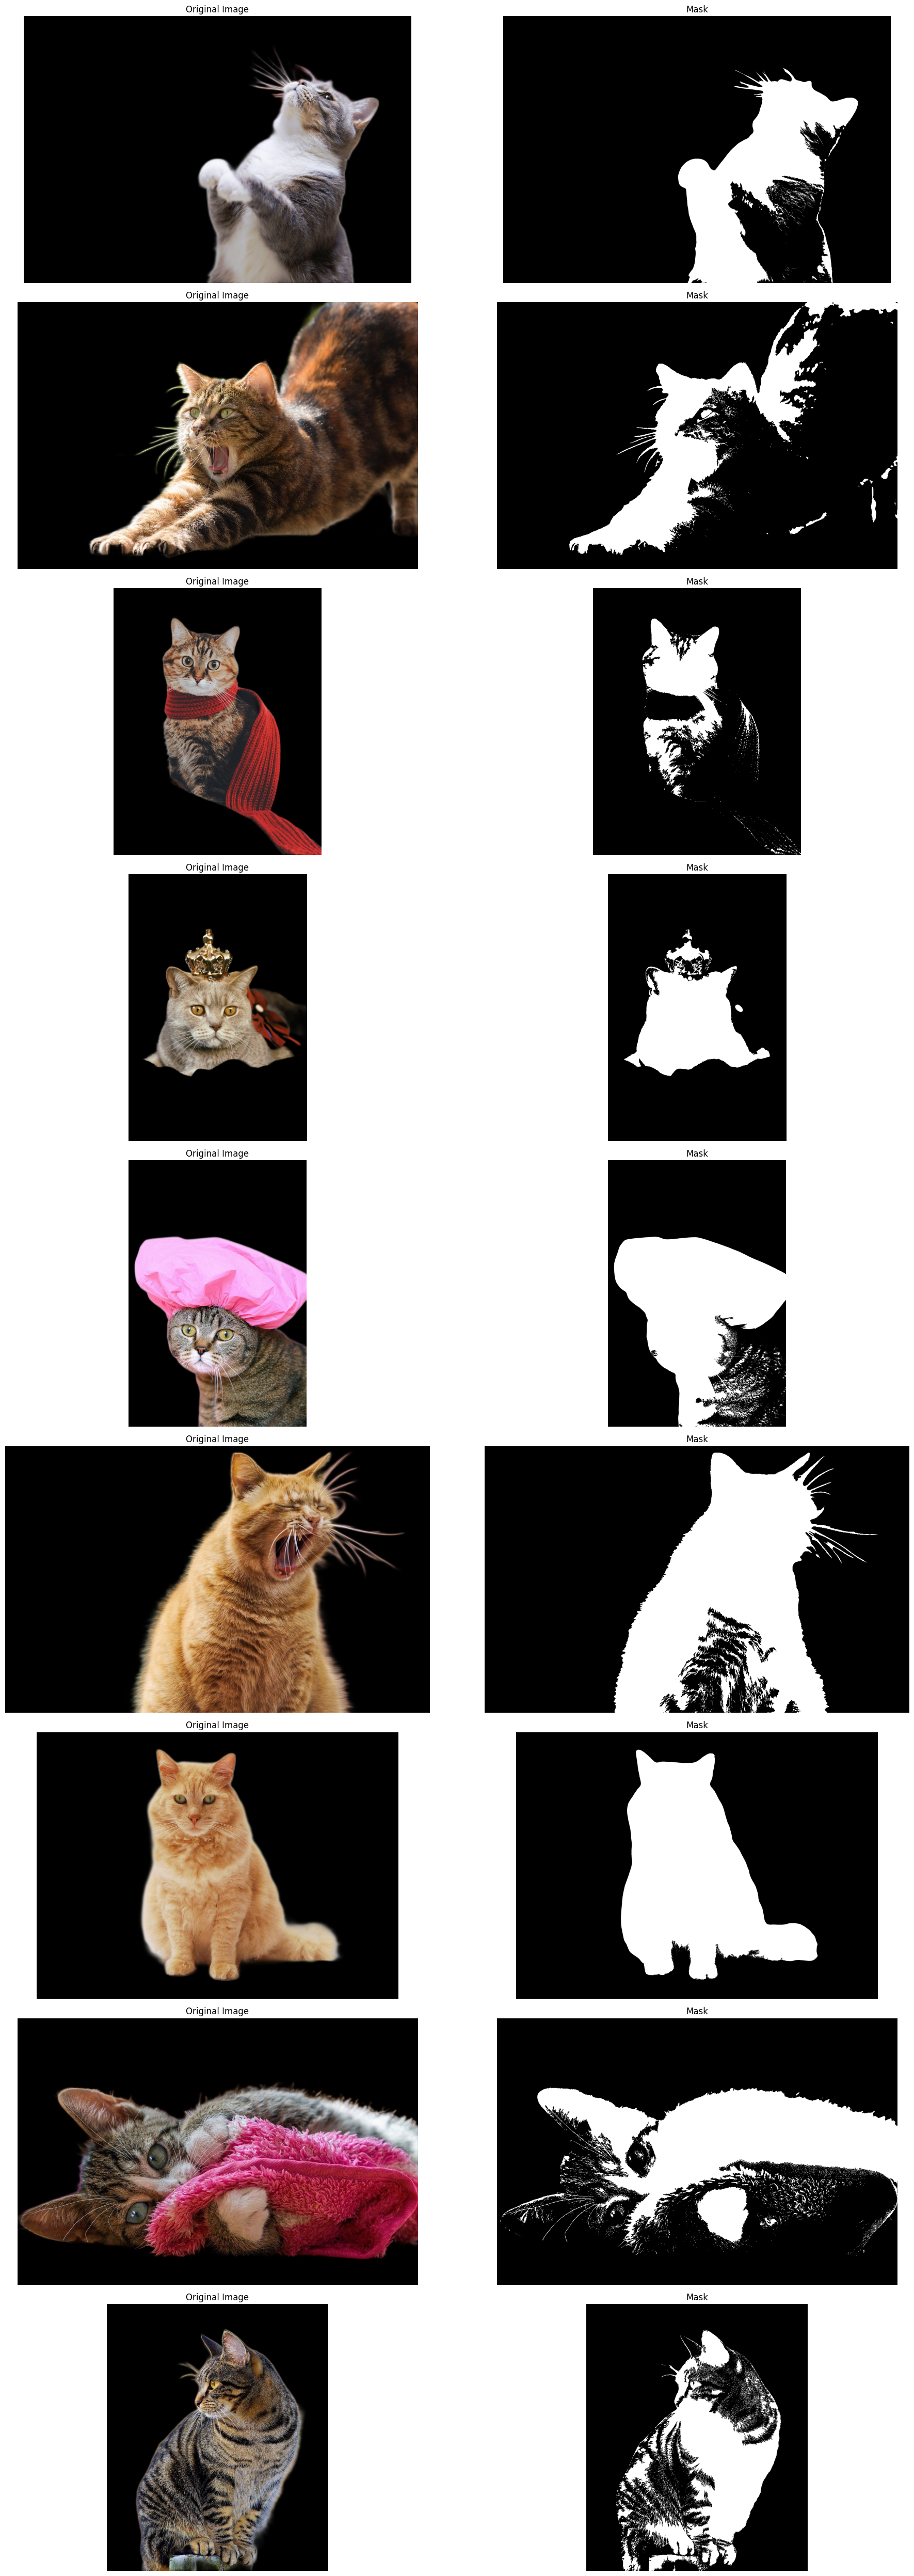

In [11]:
input_folder = 'poisson-masks'

# Subplot to display images
fig, axes = plt.subplots(nrows=9,ncols=2, figsize=(20,50))

# Grab each image to mask with Canny edge
for i, filename in enumerate(os.listdir(input_folder)):
    if filename.endswith(('.jpg','.jpeg','.png')):
        image_path = os.path.join(input_folder, filename)
        cat_mask, mask = mask_cat(image_path)
        original_image = Image.open(image_path)
        axes[i, 0].imshow(original_image)
        axes[i, 0].set_title('Original Image')
        axes[i, 0].set_xticks([])
        axes[i, 0].set_yticks([])
        axes[i, 0].axis('off')

        axes[i, 1].imshow(mask, cmap='gray')
        axes[i, 1].set_title('Mask')
        axes[i, 1].set_xticks([])
        axes[i, 1].set_yticks([])
        axes[i, 1].axis('off')

        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, mask)
plt.tight_layout()
plt.savefig('cat-mask-result.png')
plt.show()